In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
import string
import re
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import pandas as pd
df = pd.read_csv("Hotel_Reviews.csv")

In [4]:
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [5]:
df.tail()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/30/2015,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,8,7.0,"[' Leisure trip ', ' Family with older childre...",704 day,48.203745,16.335677
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/22/2015,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,5.8,"[' Leisure trip ', ' Family with young childre...",712 day,48.203745,16.335677
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,2.5,"[' Leisure trip ', ' Family with older childre...",715 day,48.203745,16.335677
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/17/2015,8.1,Atlantis Hotel Vienna,Mexico,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,8.8,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day,48.203745,16.335677
515737,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/9/2015,8.1,Atlantis Hotel Vienna,Hungary,I was in 3rd floor It didn t work Free Wife,13,2823,staff was very kind,6,1,8.3,"[' Leisure trip ', ' Family with young childre...",725 day,48.203745,16.335677


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [7]:
df.shape

(515738, 17)

In [8]:
df.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [9]:
df.dropna(inplace=True,axis=0)

In [10]:
df.duplicated().sum()

526

In [11]:
df.drop_duplicates(inplace=True)
df

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/30/2015,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,8,7.0,"[' Leisure trip ', ' Family with older childre...",704 day,48.203745,16.335677
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/22/2015,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,5.8,"[' Leisure trip ', ' Family with young childre...",712 day,48.203745,16.335677
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,2.5,"[' Leisure trip ', ' Family with older childre...",715 day,48.203745,16.335677
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/17/2015,8.1,Atlantis Hotel Vienna,Mexico,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,8.8,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day,48.203745,16.335677


Data Cleaning

In [12]:
# Remove reviews with "No Negative" or "No Positive"
df_filtered = df[(df["Negative_Review"] != "No Negative") | (df["Positive_Review"] != "No Positive")].copy()

# Define sentiment categories based on Reviewer_Score
def classify_sentiment(score):
    if score >= 7.5:
        return "positive"
    elif score <= 4.5:
        return "negative"
    else:
        return "neutral"

df_filtered["Sentiment"] = df_filtered["Reviewer_Score"].apply(classify_sentiment)

# Combine positive and negative reviews into a single text column
df_filtered["Review"] = df_filtered["Positive_Review"] + " " + df_filtered["Negative_Review"]

# Select relevant columns
df_cleaned = df_filtered[["Review", "Sentiment"]].dropna()
#df_cleaned["Sentiment"].value_counts()
df_cleaned

,Review,Sentiment
0,Only the park outside of the hotel was beauti...,negative
1,No real complaints the hotel was great great ...,positive
2,Location was good and staff were ok It is cut...,neutral
3,Great location in nice surroundings the bar a...,negative
4,Amazing location and building Romantic settin...,neutral
...,...,...
515733,location no trolly or staff to help you take...,neutral
515734,Breakfast was ok and we got earlier check in ...,neutral
515735,No Positive The ac was useless It was a hot w...,negative
515736,The rooms are enormous and really comfortable...,positive


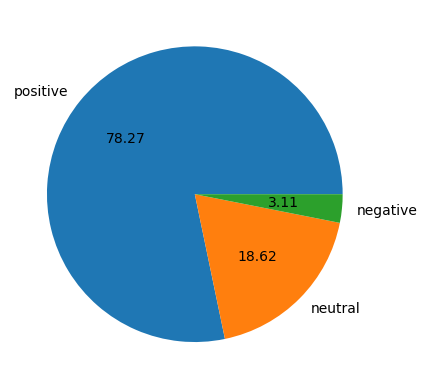

In [13]:
import matplotlib.pyplot as plt
plt.pie(df_cleaned["Sentiment"].value_counts(),labels=['positive','neutral','negative'],autopct="%0.2f")
plt.show()



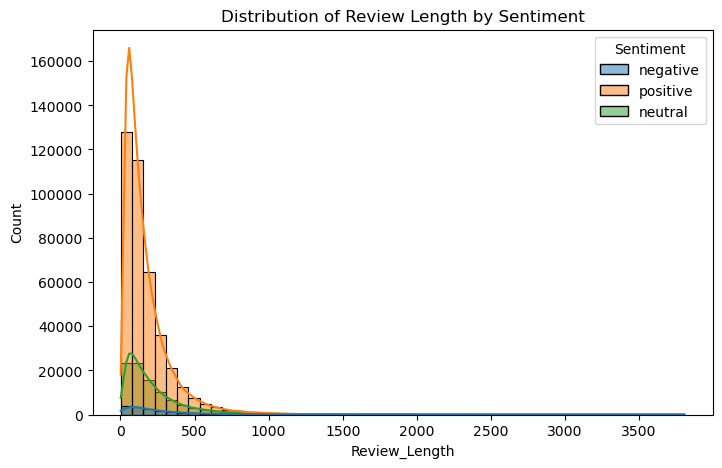

In [14]:
# Calculate review length
df_cleaned["Review_Length"] = df["Positive_Review"].apply(lambda x: len(str(x))) + df["Negative_Review"].apply(lambda x: len(str(x)))
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned, x="Review_Length", hue="Sentiment", bins=50, kde=True)
plt.title("Distribution of Review Length by Sentiment")
plt.show()



In [15]:
bins = [0, 100, 200, 300, 400, 500, 1000, 2000,3000,4000]
labels = ['0-100', '101-200', '201-300', '301-400', '401-500', '501-1000', '1001-2000','2001-3000','3001-4000']
df_cleaned["Length_Range"] = pd.cut(df_cleaned["Review_Length"], bins=bins, labels=labels)
length_table = df_cleaned["Length_Range"].value_counts().sort_index()
length_table_df = length_table.reset_index()
length_table_df.columns = ["Review Length Range", "Number of Reviews"]
print(length_table_df)

  Review Length Range  Number of Reviews
0               0-100             204397
1             101-200             147872
2             201-300              72145
3             301-400              36843
4             401-500              19243
5            501-1000              26479
6           1001-2000               4568
7           2001-3000                253
8           3001-4000                 17


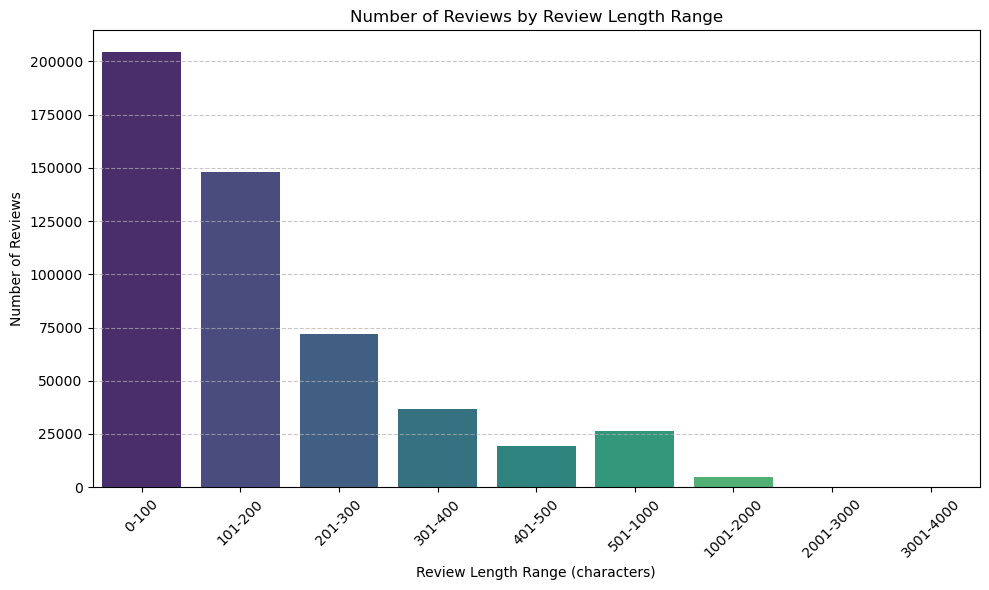

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Review Length Range", y="Number of Reviews", data=length_table_df, palette="viridis")

plt.title("Number of Reviews by Review Length Range")
plt.xlabel("Review Length Range (characters)")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [17]:
df_cleaned["Review_Length"] = pd.to_numeric(df_cleaned["Review_Length"], errors='coerce')

In [18]:
df_cleaned = df_cleaned[df_cleaned["Review_Length"]<2000]
df_cleaned


,Review,Sentiment,Review_Length,Length_Range
0,Only the park outside of the hotel was beauti...,negative,1913,1001-2000
1,No real complaints the hotel was great great ...,positive,622,501-1000
2,Location was good and staff were ok It is cut...,neutral,301,301-400
3,Great location in nice surroundings the bar a...,negative,1221,1001-2000
4,Amazing location and building Romantic settin...,neutral,774,501-1000
...,...,...,...,...
515733,location no trolly or staff to help you take...,neutral,69,0-100
515734,Breakfast was ok and we got earlier check in ...,neutral,87,0-100
515735,No Positive The ac was useless It was a hot w...,negative,88,0-100
515736,The rooms are enormous and really comfortable...,positive,136,101-200


In [19]:
PUNCT_TO_REMOVE = string.punctuation
STOPWORDS = set(stopwords.words('english'))

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

def remove_freqwords(text, freqwords):
    return " ".join([word for word in str(text).split() if word not in freqwords])

def remove_rarewords(text, rarewords):
    return " ".join([word for word in str(text).split() if word not in rarewords])

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_emoji(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)

# Preprocess pipeline function
def clean_reviews(df, col_name="Review", n_freq_words=10, n_rare_words=10):
    df[col_name] = df[col_name].str.lower()
    df[col_name] = df[col_name].apply(remove_punctuation)
    df[col_name] = df[col_name].apply(remove_stopwords)
    
# Count word frequency
    cnt = Counter()
    for text in df[col_name].values:
        for word in text.split():
            cnt[word] += 1
    
    freqwords = set([w for (w, wc) in cnt.most_common(n_freq_words)])
    rarewords = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
    
# Apply frequency-based filters
    df[col_name] = df[col_name].apply(lambda text: remove_freqwords(text, freqwords))
    df[col_name] = df[col_name].apply(lambda text: remove_rarewords(text, rarewords))
    
# Final cleaning
    df[col_name] = df[col_name].apply(remove_urls)
    df[col_name] = df[col_name].apply(remove_emoji)
    
    return df

df_cleaned = clean_reviews(df_cleaned)
df_cleaned["Review_Length"] = df_cleaned["Review"].str.len()


In [20]:
df_cleaned

,Review,Sentiment,Review_Length,Length_Range
0,park outside beautiful angry made post availab...,negative,1034,1001-2000
1,real complaints surroundings rooms amenities s...,positive,417,501-1000
2,ok cute range nice go back rooms nice elderly ...,neutral,159,301-400
3,nice surroundings bar restaurant nice lovely o...,negative,763,1001-2000
4,amazing building romantic setting booked compa...,neutral,424,501-1000
...,...,...,...,...
515733,trolly help take luggage,neutral,24,0-100
515734,ok got earlier check looks like 3 surely 4,neutral,42,0-100
515735,positive ac useless hot week vienna gave hot air,negative,48,0-100
515736,rooms enormous really comfortable believe fami...,positive,77,101-200


In [21]:
encoder = LabelEncoder()
df_cleaned['Sentiment'] = encoder.fit_transform(df_cleaned['Sentiment'])
df_cleaned['Sentiment'].value_counts()

Sentiment
2    400474
1     95205
0     15866
Name: count, dtype: int64

In [22]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

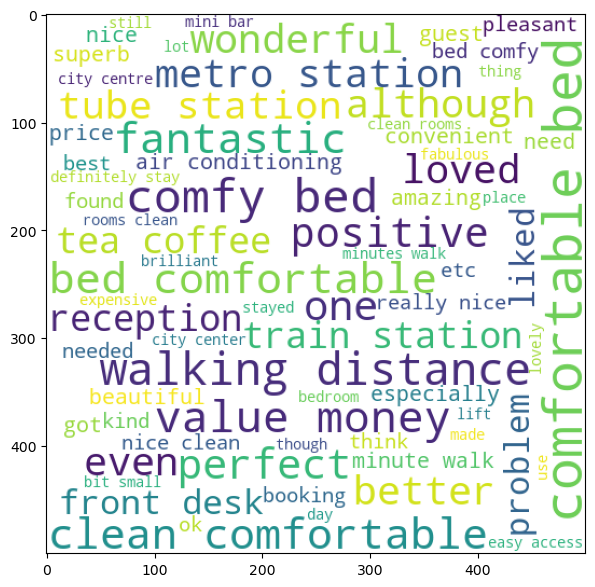

In [23]:
positive_wc = wc.generate(df_cleaned[df_cleaned['Sentiment'] == 2]['Review'].str.cat(sep=" "))
plt.figure(figsize=(15,7))
plt.imshow(positive_wc)


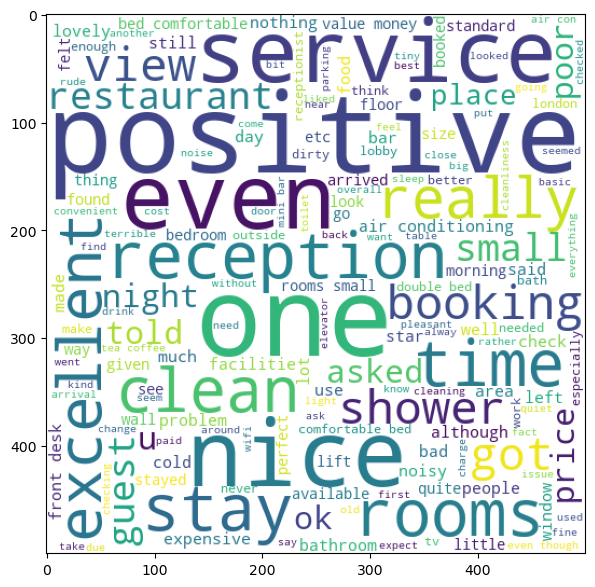

In [24]:
neutral_wc = wc.generate(df_cleaned[df_cleaned['Sentiment'] == 1]['Review'].str.cat(sep=" "))
plt.figure(figsize=(15,7))
plt.imshow(neutral_wc)

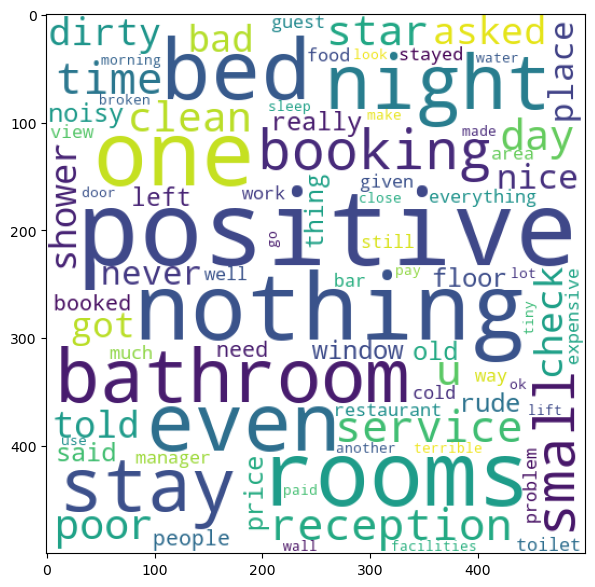

In [25]:
negative_wc = wc.generate(df_cleaned[df_cleaned['Sentiment'] == 0]['Review'].str.cat(sep=" "))
plt.figure(figsize=(15,7))
plt.imshow(negative_wc)

Performing spelling check using SymSpell

In [26]:
pip install symspellpy


Note: you may need to restart the kernel to use updated packages.


In [27]:
from symspellpy import SymSpell, Verbosity
import pkg_resources

# Initialize
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)

# Load dictionary
dictionary_path = pkg_resources.resource_filename("symspellpy", "frequency_dictionary_en_82_765.txt")
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

def correct_spelling_symspell(text):
    corrected = []
    for word in text.split():
        suggestion = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=2)
        corrected_word = suggestion[0].term if suggestion else word
        corrected.append(corrected_word)
    return " ".join(corrected)

df_cleaned["Review"] = df_cleaned["Review"].apply(correct_spelling_symspell)


In [28]:
df_cleaned

,Review,Sentiment,Review_Length,Length_Range
0,park outside beautiful angry made post availab...,0,1034,1001-2000
1,real complaints surroundings rooms amenities s...,2,417,501-1000
2,of cute range nice go back rooms nice elderly ...,1,159,301-400
3,nice surroundings bar restaurant nice lovely o...,0,763,1001-2000
4,amazing building romantic setting booked compa...,1,424,501-1000
...,...,...,...,...
515733,trolley help take luggage,1,24,0-100
515734,of got earlier check looks like a surely a,1,42,0-100
515735,positive a useless hot week vienna gave hot air,0,48,0-100
515736,rooms enormous really comfortable believe fami...,2,77,101-200


Performing lemmatization

In [29]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [30]:
from spacy.cli import download

download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [31]:
import spacy
nlp = spacy.load("en_core_web_sm")

def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if token.lemma_ != "-PRON-"])

df_cleaned["Review"] = df_cleaned["Review"].apply(lemmatize_text)

In [32]:
df_cleaned

,Review,Sentiment,Review_Length,Length_Range
0,park outside beautiful angry make post availab...,0,1034,1001-2000
1,real complaint surrounding room amenity servic...,2,417,501-1000
2,of cute range nice go back room nice elderly b...,1,159,301-400
3,nice surrounding bar restaurant nice lovely ou...,0,763,1001-2000
4,amazing build romantic setting book company li...,1,424,501-1000
...,...,...,...,...
515733,trolley help take luggage,1,24,0-100
515734,of get early check look like a surely a,1,42,0-100
515735,positive a useless hot week vienna give hot air,0,48,0-100
515736,room enormous really comfortable believe famil...,2,77,101-200


Performing oversampling as the data is imbalanced

In [33]:
from imblearn.over_sampling import RandomOverSampler

X = df_cleaned["Review"]
y = df_cleaned["Sentiment"]
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10000)
X_vect = vectorizer.fit_transform(X)

# Applying oversampling
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_vect, y)


Training and evaluating the data

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [35]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    BaggingClassifier, ExtraTreesClassifier
)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


In [36]:
results = []

In [37]:
clf = LogisticRegression(class_weight='balanced', max_iter=500)
clf.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=500)

In [38]:
y_pred = clf.predict(X_test)
results.append({
    "Classifier": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, average='macro'),
    "Recall": recall_score(y_test, y_pred, average='macro'),
    "F1 Score": f1_score(y_test, y_pred, average='macro')
})
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77     79974
           1       0.63      0.60      0.62     80118
           2       0.77      0.77      0.77     80193

    accuracy                           0.72    240285
   macro avg       0.72      0.72      0.72    240285
weighted avg       0.72      0.72      0.72    240285



Naive Bayes

In [39]:
clf = MultinomialNB()
clf.fit(X_train, y_train)


MultinomialNB()

In [40]:
y_pred = clf.predict(X_test)
results.append({
    "Classifier": "Naive Bayes",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, average='macro'),
    "Recall": recall_score(y_test, y_pred, average='macro'),
    "F1 Score": f1_score(y_test, y_pred, average='macro')
})
print("Naive Bayes:\n", classification_report(y_test, y_pred))

Naive Bayes:
               precision    recall  f1-score   support

           0       0.69      0.74      0.71     79974
           1       0.59      0.56      0.57     80118
           2       0.75      0.73      0.74     80193

    accuracy                           0.67    240285
   macro avg       0.67      0.67      0.67    240285
weighted avg       0.67      0.67      0.67    240285



Support Vector Machine

In [41]:
clf = LinearSVC(class_weight='balanced', max_iter=1000)
clf.fit(X_train, y_train)

LinearSVC(class_weight='balanced')

In [42]:
y_pred = clf.predict(X_test)
results.append({
    "Classifier": "SVM (LinearSVC)",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, average='macro'),
    "Recall": recall_score(y_test, y_pred, average='macro'),
    "F1 Score": f1_score(y_test, y_pred, average='macro')
})

print("SVM (LinearSVC):\n", classification_report(y_test, y_pred))

SVM (LinearSVC):
               precision    recall  f1-score   support

           0       0.73      0.81      0.77     79974
           1       0.64      0.56      0.60     80118
           2       0.75      0.77      0.76     80193

    accuracy                           0.71    240285
   macro avg       0.71      0.71      0.71    240285
weighted avg       0.71      0.71      0.71    240285



Random Forest

In [43]:
clf = RandomForestClassifier(n_estimators=50, max_depth=10,class_weight='balanced')
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=50)

In [44]:
y_pred = clf.predict(X_test)
results.append({
    "Classifier": "Random Forest",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, average='macro'),
    "Recall": recall_score(y_test, y_pred, average='macro'),
    "F1 Score": f1_score(y_test, y_pred, average='macro')
})
print("Random Forest:\n", classification_report(y_test, y_pred))

Random Forest:
               precision    recall  f1-score   support

           0       0.67      0.64      0.65     79974
           1       0.54      0.34      0.42     80118
           2       0.59      0.84      0.70     80193

    accuracy                           0.61    240285
   macro avg       0.60      0.61      0.59    240285
weighted avg       0.60      0.61      0.59    240285



K-Nearest Neighbors

In [45]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)


KNeighborsClassifier()

In [46]:
y_pred = clf.predict(X_test)
results.append({
    "Classifier": "K-Nearest Neighbors",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, average='macro'),
    "Recall": recall_score(y_test, y_pred, average='macro'),
    "F1 Score": f1_score(y_test, y_pred, average='macro')
})
print("K-Nearest Neighbors:\n", classification_report(y_test, y_pred))

K-Nearest Neighbors:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93     79974
           1       0.79      0.83      0.81     80118
           2       0.82      0.70      0.76     80193

    accuracy                           0.84    240285
   macro avg       0.84      0.84      0.83    240285
weighted avg       0.84      0.84      0.83    240285



Gradient Boosting

In [47]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)


GradientBoostingClassifier()

In [48]:
y_pred = clf.predict(X_test)
results.append({
    "Classifier": "Gradient Boosting",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, average='macro'),
    "Recall": recall_score(y_test, y_pred, average='macro'),
    "F1 Score": f1_score(y_test, y_pred, average='macro')
})
print("Gradient Boosting:\n", classification_report(y_test, y_pred))

Gradient Boosting:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67     79974
           1       0.53      0.52      0.52     80118
           2       0.69      0.71      0.70     80193

    accuracy                           0.63    240285
   macro avg       0.63      0.63      0.63    240285
weighted avg       0.63      0.63      0.63    240285



XGBoost

In [49]:
clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [50]:
y_pred = clf.predict(X_test)
results.append({
    "Classifier": "XGBoost",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, average='macro'),
    "Recall": recall_score(y_test, y_pred, average='macro'),
    "F1 Score": f1_score(y_test, y_pred, average='macro')
})
print("XGBoost:\n", classification_report(y_test, y_pred))

XGBoost:
               precision    recall  f1-score   support

           0       0.76      0.75      0.75     79974
           1       0.62      0.58      0.60     80118
           2       0.72      0.78      0.75     80193

    accuracy                           0.70    240285
   macro avg       0.70      0.70      0.70    240285
weighted avg       0.70      0.70      0.70    240285



AdaBoost

In [51]:
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)

AdaBoostClassifier()

In [52]:
y_pred = clf.predict(X_test)
results.append({
    "Classifier": "AdaBoost",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, average='macro'),
    "Recall": recall_score(y_test, y_pred, average='macro'),
    "F1 Score": f1_score(y_test, y_pred, average='macro')
})
print("AdaBoost:\n", classification_report(y_test, y_pred))

AdaBoost:
               precision    recall  f1-score   support

           0       0.69      0.63      0.66     79974
           1       0.50      0.44      0.47     80118
           2       0.63      0.77      0.69     80193

    accuracy                           0.61    240285
   macro avg       0.61      0.61      0.60    240285
weighted avg       0.61      0.61      0.60    240285



Bagging Classifier

In [73]:
clf = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=None),  
    n_estimators=100,
    max_samples=1.0,
    max_features=1.0,
    n_jobs=-1,
    random_state=42)
clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                  max_features=0.8, max_samples=0.8, n_jobs=-1,
                  random_state=42)

In [74]:
y_pred = clf.predict(X_test)
results.append({
    "Classifier": "Bagging Classifier",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, average='macro'),
    "Recall": recall_score(y_test, y_pred, average='macro'),
    "F1 Score": f1_score(y_test, y_pred, average='macro')
})

print("Bagging Classifier:\n", classification_report(y_test, y_pred))

Bagging Classifier:
               precision    recall  f1-score   support

           0       0.62      0.59      0.60     79974
           1       0.48      0.06      0.10     80118
           2       0.45      0.87      0.60     80193

    accuracy                           0.51    240285
   macro avg       0.52      0.51      0.43    240285
weighted avg       0.52      0.51      0.43    240285



Decision Tree

In [ ]:
clf = DecisionTreeClassifier(max_depth=10,
    max_leaf_nodes=100,
    min_samples_split=10,
    random_state=42,
    class_weight='balanced')
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)
results.append({
    "Classifier": "Decision Tree",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, average='macro'),
    "Recall": recall_score(y_test, y_pred, average='macro'),
    "F1 Score": f1_score(y_test, y_pred, average='macro')
})
print("Decision Tree:\n", classification_report(y_test, y_pred))

Extra Trees Classifier

In [66]:
clf = ExtraTreesClassifier(n_estimators=50,         
    max_depth=15,             
    max_features='sqrt',      
    n_jobs=-1,                
    random_state=42)
clf.fit(X_train, y_train)

ExtraTreesClassifier(max_depth=15, n_estimators=50, n_jobs=-1, random_state=42)

In [67]:
y_pred = clf.predict(X_test)
results.append({
    "Classifier": "Extra trees classifier",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, average='macro'),
    "Recall": recall_score(y_test, y_pred, average='macro'),
    "F1 Score": f1_score(y_test, y_pred, average='macro')
})

print("Extra Trees:\n", classification_report(y_test, y_pred))

Extra Trees:
               precision    recall  f1-score   support

           0       0.68      0.67      0.68     79974
           1       0.56      0.38      0.45     80118
           2       0.61      0.81      0.70     80193

    accuracy                           0.62    240285
   macro avg       0.62      0.62      0.61    240285
weighted avg       0.62      0.62      0.61    240285



Comparing the classifiers performance

In [71]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
print(results_df)

               Classifier  Accuracy  Precision    Recall  F1 Score
0                    k-NN  0.836515   0.835201  0.836639  0.833523
1     Logistic Regression  0.720082   0.718494  0.720109  0.719048
2                     SVM  0.714227   0.709948  0.714267  0.710411
3                 XGBoost  0.700206   0.698241  0.700210  0.698648
4             Naive Bayes  0.674253   0.673155  0.674277  0.673190
5       Gradient Boosting  0.629482   0.628354  0.629479  0.628841
6  Extra trees classifier  0.622261   0.617535  0.622231  0.609152
7      Bagging Classifier  0.622261   0.617535  0.622231  0.609152
8                AdaBoost  0.610379   0.606424  0.610341  0.604884
9           Decision Tree  0.545265   0.548023  0.545218  0.512811


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(10, 6))
results_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.show()

In [ ]:
sdf